You are given the root of a binary tree with n nodes. Each node is assigned a unique value from 1 to n. You are also given an array queries of size m.

You have to perform m independent queries on the tree where in the ith query you do the following:

    Remove the subtree rooted at the node with the value queries[i] from the tree. It is guaranteed that queries[i] will not be equal to the value of the root.

Return an array answer of size m where answer[i] is the height of the tree after performing the ith query.

Note:

    The queries are independent, so the tree returns to its initial state after each query.
    The height of a tree is the number of edges in the longest simple path from the root to some node in the tree.

 

Example 1:

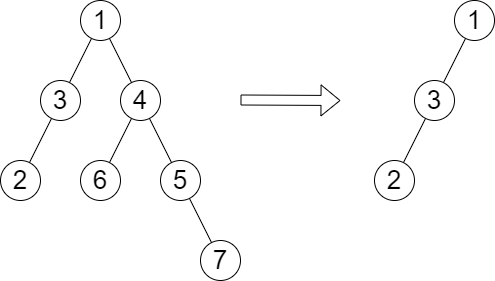

Input: root = [1,3,4,2,null,6,5,null,null,null,null,null,7], queries = [4]
Output: [2]
Explanation: The diagram above shows the tree after removing the subtree rooted at node with value 4.
The height of the tree is 2 (The path 1 -> 3 -> 2).

Example 2:

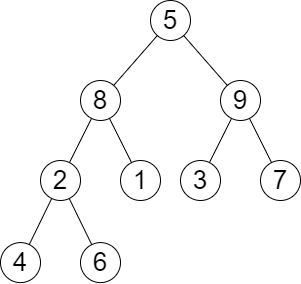

Input: root = [5,8,9,2,1,3,7,4,6], queries = [3,2,4,8]
Output: [3,2,3,2]
Explanation: We have the following queries:
- Removing the subtree rooted at node with value 3. The height of the tree becomes 3 (The path 5 -> 8 -> 2 -> 4).
- Removing the subtree rooted at node with value 2. The height of the tree becomes 2 (The path 5 -> 8 -> 1).
- Removing the subtree rooted at node with value 4. The height of the tree becomes 3 (The path 5 -> 8 -> 2 -> 6).
- Removing the subtree rooted at node with value 8. The height of the tree becomes 2 (The path 5 -> 9 -> 3).

 

Constraints:

    The number of nodes in the tree is n.
    2 <= n <= 105
    1 <= Node.val <= n
    All the values in the tree are unique.
    m == queries.length
    1 <= m <= min(n, 104)
    1 <= queries[i] <= n
    queries[i] != root.val



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def treeQueries(self, root: Optional[TreeNode], queries: List[int]) -> List[int]:
        result_map = {}
        height_cache = {}

        # Function to calculate the height of the tree
        def _height(node):
            if not node:
                return -1

            # Return cached height if already calculated
            if node in height_cache:
                return height_cache[node]

            h = 1 + max(_height(node.left), _height(node.right))
            height_cache[node] = h
            return h

        # DFS to precompute the maximum values after removing the subtree
        def _dfs(node, depth, max_val):
            if not node:
                return

            result_map[node.val] = max_val

            # Traverse left and right subtrees while updating max values
            _dfs(
                node.left,
                depth + 1,
                max(max_val, depth + 1 + _height(node.right)),
            )
            _dfs(
                node.right,
                depth + 1,
                max(max_val, depth + 1 + _height(node.left)),
            )

        # Run DFS to fill result_map with maximum heights after each query
        _dfs(root, 0, 0)

        # Build the result array based on the queries
        return [result_map[q] for q in queries]